# QTM 151 Final project

# Statistical Analysis on F1 Races

Qtm151 Section 2 Group Members: Eric Chen, Sissi Li, Stephanie Li, Jason Zhang



# I. Introduction

F1 is the one of the most prestigious international automobile racings around the globe. It's a competition where different teams from around the globe compete in a series of Grand Prix races held worldwide. It's a sport where performance is determined  not only by the skill of the driver, but also other complex factors including, car models and circuits. In this project, we aim to answer the following question:
**What are the most influential factors that determine race outcomes in Formula 1?**  This analytical question was generated based on the our interest about performance and serves as an quantatitive analysis for teams interested in optimizing their performance. 

Our project would dive deep into different datasets of F1 racer results. By applying statiscal modeling and data cleaning, we hope to identify trends and factors that are associtated with race performance. We would present our findings through visualizations, concluding with insights on how data can support better performances. In this project, our team will focus on four potential factors, including **Driver Performance**, **Constructor Team Strength**, **Qualifying Position and Race Start**, and **Circuit Characrteristics**. The following sections will cover data exploration, data cleaning and sorting, visualizations, regressions,and conclusions. The analysis of the results and visualizations suggests that performance in Formula 1 races is driven more by team strength and constuctor performance comapred to driver's experience or age.

# II. Data Exploration

Let's first begin by importing some important packages

In [148]:
##import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from datetime import date, time, datetime

Now the important packages have been successfully imported. We can start importing some of the data that this project would perform analysis on. For this project, we would be using datasets including circuits.csv, constructor_results.csv, constructors.csv

In [149]:
## Import Data Sets

## Results data sets
results = pd.read_csv("data_raw/results.csv")

## Drivers data sets
drivers = pd.read_csv("data_raw/drivers.csv")
drivers_standings= pd.read_csv("data_raw/driver_standings.csv")

## Constructor data sets
constructors = pd.read_csv("data_raw/constructors.csv")
constructors_results= pd.read_csv("data_raw/constructor_results.csv")
constructors_standings= pd.read_csv("data_raw/constructor_standings.csv")

## Qualifying Position and Race Start data sets
qualifying = pd.read_csv("data_raw/qualifying.csv")
races= pd.read_csv("data_raw/races.csv")



We have successfully imported several datasets into the system, including information on constructors, constructor results, circuits, and seasons. Now, we’ll begin exploring each dataset to better understand their structure and contents. This initial exploration will involve previewing the data, checking column types and missing values, and generating basic descriptive statistics to guide further analysis.

## 1. Preview the Data

We’ll look at the first few rows to get a sense of the data format and column names:

In [151]:
# Preview datasets
print("Results Dataset Preview:")
print(results.head(), "\n")

print("Drivers Dataset Preview:")
print(drivers.head(), "\n")

print("Driver Standings Dataset Preview:")
print(drivers_standings.head(), "\n")

print("Constructors Dataset Preview:")
print(constructors.head(), "\n")

print("Constructor Results Dataset Preview:")
print(constructors_results.head(), "\n")

print("Constructor Standings Dataset Preview:")
print(constructors_standings.head(), "\n")

print("Qualifying Dataset Preview:")
print(qualifying.head(), "\n")

print("Races Dataset Preview:")
print(races.head(), "\n")

Results Dataset Preview:
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300      

Based on the preview of the datasets, here is a description of each dataset:

1. **Results Dataset**: Contains information about race results, including driver performance, finishing positions, and points scored in each race.

2. **Drivers Dataset**: Provides details about the drivers, such as their names, nationalities, and other personal information.

3. **Driver Standings Dataset**: Tracks the standings of drivers throughout the season, including their accumulated points and rankings.

4. **Constructors Dataset**: Includes information about the constructors (teams), such as their names and nationalities.

5. **Constructor Results Dataset**: Details the performance of constructors in individual races, including points scored and other metrics.

6. **Constructor Standings Dataset**: Tracks the standings of constructors throughout the season, including their accumulated points and rankings.

7. **Qualifying Dataset**: Contains data about qualifying sessions, including drivers' qualifying positions and lap times.

8. **Circuits Dataset**: Provides information about the circuits where races are held, including their locations and other attributes.

## 2. Check column names and data types

This helps us identify which columns might need transformation or cleaning:

In [152]:
# Check column data types for each dataset
print("Results Dataset Column Data Types:")
print(results.dtypes, "\n")

print("Drivers Dataset Column Data Types:")
print(drivers.dtypes, "\n")

print("Driver Standings Dataset Column Data Types:")
print(drivers_standings.dtypes, "\n")

print("Constructors Dataset Column Data Types:")
print(constructors.dtypes, "\n")

print("Constructor Results Dataset Column Data Types:")
print(constructors_results.dtypes, "\n")

print("Constructor Standings Dataset Column Data Types:")
print(constructors_standings.dtypes, "\n")

print("Qualifying Dataset Column Data Types:")
print(qualifying.dtypes, "\n")

Results Dataset Column Data Types:
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object 

Drivers Dataset Column Data Types:
driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
url            object
dtype: object 

Driver Standings Dataset Column Data Types:
driverStandingsId      int64
raceId                 int64
driverId               int64
points               float64
position               int64
positionText          obj

1. **Results Dataset**: The dataset has Contains a mix of numerical columns  and categorical columns. These data types indicate the dataset is primarily used for numerical analysis and relational mapping. 

2. **Drivers Dataset**: Includes categorical columns such as driver names, nationalities, and IDs. These columns are useful for identifying and describing individual drivers.

3. **Driver Standings Dataset**: Primarily consists of numerical columns and categorical columns . This dataset is structured for tracking driver performance over time.

4. **Constructors Dataset**: Contains categorical columns such as constructor names and nationalities. These columns provide descriptive information about the teams.

5. **Constructor Results Dataset**: Includes numerical columns (e.g., points scored) and categorical columns . This dataset is used to analyze team performance in races.

6. **Constructor Standings Dataset**: Similar to the driver standings dataset, it contains numerical columns (e.g., points, rankings) and categorical columns for tracking team performance.

7. **Qualifying Dataset**: Contains numerical columns  and categorical columns. This dataset is focused on pre-race performance.


## 3. Get basic statistics (numeric columns)
This provides a quick overview of the distribution and possible outliers:

In [153]:
# Get basic statistical summary for each dataset
print("Results Dataset Statistics:")
print(results.describe(), "\n")

print("Drivers Dataset Statistics:")
print(drivers.describe(), "\n") 

print("Driver Standings Dataset Statistics:")
print(drivers_standings.describe(), "\n")

print("Constructors Dataset Statistics:")
print(constructors.describe(), "\n")  

print("Constructor Results Dataset Statistics:")
print(constructors_results.describe(), "\n")

print("Constructor Standings Dataset Statistics:")
print(constructors_standings.describe(), "\n")

print("Qualifying Dataset Statistics:")
print(qualifying.describe(), "\n")


Results Dataset Statistics:
           resultId        raceId      driverId  constructorId          grid  \
count  25840.000000  25840.000000  25840.000000   25840.000000  25840.000000   
mean   12921.334327    531.425813    261.732082      48.628328     11.179063   
std     7460.682031    299.440908    268.623016      59.732131      7.243725   
min        1.000000      1.000000      1.000000       1.000000      0.000000   
25%     6460.750000    293.000000     56.000000       6.000000      5.000000   
50%    12920.500000    514.000000    163.000000      25.000000     11.000000   
75%    19380.250000    784.000000    360.000000      58.000000     17.000000   
max    25845.000000   1096.000000    856.000000     214.000000     34.000000   

       positionOrder        points          laps      statusId  
count   25840.000000  25840.000000  25840.000000  25840.000000  
mean       12.876006      1.877053     45.977515     17.568692  
std         7.712391      4.169849     29.808951     26.

# III. Data Manipulation & Cleaning

Now we will merge the data for each factor analysis

## Factor 1: Driver Experience

The following code prepares and combines Formula 1 datasets to analyze driver performance alongside demographic and race information. First, it renames columns in the drivers and results DataFrames to avoid naming conflicts, changing "number" to "driver_number" and "position" to "results_position". It then merges the drivers and results datasets by driverId  to associate each driver's details with their race outcomes. Next, it merges this combined dataset with the races dataset on raceId, adding race-specific information. To calculate each driver's age at the time of a race, the code converts the date of birth (dob) column to datetime format, then subtracts the birth year from the race year. 

In [154]:
# Rename columns before merging
drivers_renamed = drivers.rename(columns={"number": "driver_number"})
results_renamed = results.rename(columns={"position": "results_position"})

# Merge drivers with results on driverId
drivers_results_merged = pd.merge(drivers_renamed, results_renamed, on="driverId", how="inner")

# Then merge with races on raceId to get race info
drivers_races_merged = pd.merge(drivers_results_merged, races, on="raceId", how="inner")

# Convert dob to datetime for age calculation
drivers_races_merged['dob'] = pd.to_datetime(drivers_races_merged['dob'], errors='coerce')

# Compute age at time of race
drivers_races_merged['age'] = drivers_races_merged['year'] - drivers_races_merged['dob'].dt.year

# Display the final DataFrame
print(drivers_races_merged.head())



   driverId driverRef driver_number code forename   surname        dob  \
0         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   
1         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   
2         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   
3         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   
4         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   

  nationality                                        url_x  resultId  ...  \
0     British  http://en.wikipedia.org/wiki/Lewis_Hamilton         1  ...   
1     British  http://en.wikipedia.org/wiki/Lewis_Hamilton        27  ...   
2     British  http://en.wikipedia.org/wiki/Lewis_Hamilton        57  ...   
3     British  http://en.wikipedia.org/wiki/Lewis_Hamilton        69  ...   
4     British  http://en.wikipedia.org/wiki/Lewis_Hamilton        90  ...   

   fp1_time  fp2_date fp2_time  fp3_date fp3_time quali_date  quali_time  \
0        \N     

#### Data Cleaning:
First, data types were inspected to ensure appropriate formats, and missing values were identified. In the drivers-races dataset, rows with missing results_position were dropped, and non-numeric values were coerced into numeric types. The number and date columns were also converted to numeric and datetime formats, respectively. Duplicate entries based on driverId and raceId were removed, and a race count variable was added per driver. 

In [155]:
# Data Cleaning:
# 1. Check the data type:
print(drivers_races_merged.dtypes)

# 2. Check for missing values
print(drivers_races_merged.isnull().sum()) 
drivers_races_merged_clean = drivers_races_merged.dropna(subset=['results_position'])
drivers_races_merged_clean['results_position'] = pd.to_numeric(drivers_races_merged_clean['results_position'], errors='coerce')


# 3. Convert and Recode Data
drivers_races_merged_clean['number'] = pd.to_numeric(drivers_races_merged_clean['number'], errors='coerce')
drivers_races_merged_clean['date'] = pd.to_datetime(drivers_races_merged_clean['date'], errors='coerce')
print(drivers_races_merged_clean['date'].dtype) 

# 4. Filtering redundant entries:
drivers_races_merged_clean = drivers_races_merged_clean.drop_duplicates(subset=['driverId', 'raceId'])

# 5. Add race count (experience) per driver
race_counts =drivers_races_merged_clean['driverId'].value_counts().reset_index()
race_counts.columns = ['driverId', 'race_counts']

# 6. Merge it into the main DataFrame
drivers_races_merged_clean = pd.merge(
    drivers_races_merged_clean, race_counts, on='driverId', how='left'
)

driverId                     int64
driverRef                   object
driver_number               object
code                        object
forename                    object
surname                     object
dob                 datetime64[ns]
nationality                 object
url_x                       object
resultId                     int64
raceId                       int64
constructorId                int64
number                      object
grid                         int64
results_position            object
positionText                object
positionOrder                int64
points                     float64
laps                         int64
time_x                      object
milliseconds                object
fastestLap                  object
rank                        object
fastestLapTime              object
fastestLapSpeed             object
statusId                     int64
year                         int64
round                        int64
circuitId           

## Factor 2: Constructor Strength

First, it merges the constructors and results DataFrames on the constructorId column, selecting only the raceId, constructorId, and position columns from results, to associate each constructor with its race outcomes (constructors_results_merged). Then, it merges this dataset with the races DataFrame by raceId, bringing in the year information for each race (constructors_races_data). The result is a dataset that connects each constructor’s race performance (position) with the specific year of the event. 

In [156]:
# Merge constructors with results on constructorId to get per-driver race points
constructors_results_merged = pd.merge(
    constructors,
    results[['raceId', 'constructorId', 'position']],
    on='constructorId',
    how='inner'
)

# Merge with races to include year information
constructors_races_data = pd.merge(
    constructors_results_merged,
    races[['raceId', 'year']],
    on='raceId',
    how='inner'
)

# Display the merged dataset
constructors_races_data.head()


,constructorId,constructorRef,name,nationality,url,raceId,position,year
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,1,2008
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,5,2008
2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,19,3,2008
3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,19,5,2008
4,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,20,5,2008


#### Data Cleaning:
 First, data types were inspected to ensure appropriate formats, and missing values were identified. For the constructors-races dataset, missing position entries were replaced with NaN, converted to numeric, and rows with missing values were filtered out. 

In [157]:
# Data Cleaning:
# 1. Check the data type:
print(constructors_races_data.dtypes)

# 2. Check for missing values
constructors_races_data['position'] = constructors_races_data['position'].replace('\\N', np.nan)
constructors_races_data['position'] = pd.to_numeric(constructors_races_data['position'], errors='coerce')
constructors_races_data_cleaned = constructors_races_data[constructors_races_data['position'].notna()]

print(constructors_races_data_cleaned.isnull().sum()) 


constructorId      int64
constructorRef    object
name              object
nationality       object
url               object
raceId             int64
position          object
year               int64
dtype: object
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
raceId            0
position          0
year              0
dtype: int64


## Factor 3: Seasonal Performance

We merged the driver standings and race results datasets by driverId to connect each driver's seasonal win record to their race results. This step allowed us to investigate whether a driver's total number of wins across the season relates to their performance in individual races.

 

In [158]:
# Merge Driver Standings with results on DriverId
standings_trimmed = drivers_standings[['raceId', 'driverId', 'wins']]

results_with_wins = pd.merge(
    drivers_races_merged_clean,
    standings_trimmed,
    on=['raceId', 'driverId'],
    how='left'
)
# Display the resulting dataset
results_with_wins.head()


,driverId,driverRef,driver_number,code,forename,surname,dob,nationality,url_x,resultId,...,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,age,race_counts,wins
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,\N,\N,\N,\N,\N,\N,\N,23,310,1.0
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,...,\N,\N,\N,\N,\N,\N,\N,23,310,1.0
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,57,...,\N,\N,\N,\N,\N,\N,\N,23,310,1.0
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,...,\N,\N,\N,\N,\N,\N,\N,23,310,1.0
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,90,...,\N,\N,\N,\N,\N,\N,\N,23,310,1.0


#### Data Cleaning

After merging, we performed data cleaning: missing or invalid results_position entries were replaced with NaN and removed, columns were coerced to numeric types, and duplicate entries (based on raceId and driverId) were dropped. This ensured the dataset was clean and ready for analysis, with appropriate numeric formats for both race finishing positions and wins.

In [87]:
# Data Cleaning:
# 1. Check the data type:
print(results_with_wins.dtypes)

# 2. Check for missing values and clean the colume of position
results_with_wins['results_position'] = results_with_wins['results_position'].replace('\\N', np.nan)
results_with_wins['results_position'] = pd.to_numeric(results_with_wins['results_position'], errors='coerce')
results_with_wins_cleaned = results_with_wins[results_with_wins['results_position'].notna()]
print(results_with_wins_cleaned.isnull().sum())

# 3. Convert and Recode Data
results_with_wins_cleaned['win'] = pd.to_numeric(results_with_wins['wins'], errors='coerce')

# 4. Filteirng:
results_with_wins_cleaned = results_with_wins_cleaned.drop_duplicates(subset=['raceId', 'driverId'])

driverId                     int64
driverRef                   object
driver_number               object
code                        object
forename                    object
surname                     object
dob                 datetime64[ns]
nationality                 object
url_x                       object
resultId                     int64
raceId                       int64
constructorId                int64
number                     float64
grid                         int64
results_position           float64
positionText                object
positionOrder                int64
points                     float64
laps                         int64
time_x                      object
milliseconds                object
fastestLap                  object
rank                        object
fastestLapTime              object
fastestLapSpeed             object
statusId                     int64
year                         int64
round                        int64
circuitId           

/var/folders/sl/nfht5cjs09gf74zv7nzby3n80000gn/T/ipykernel_72480/765261071.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_with_wins_cleaned['win'] = pd.to_numeric(results_with_wins['wins'], errors='coerce')


## Factor 4: Qualifying Performance

First, it renames overlapping columns in the qualifying and results DataFrames: "position" becomes "qualifying_position" and "results_position", and "number" becomes "qualifying_number" and "results_number", to avoid conflicts during merging. Then, it merges qualifying_renamed and results_renamed on both driverId and raceId, connecting each driver's qualifying results with their final race outcomes. After that, it merges this combined dataset with the races DataFrame on raceId, adding year information for time-based analysis. 

In [88]:
# Rename Columns Prior to Merging
# Rename both 'position' and 'number' columns in one step for each DataFrame
qualifying_renamed = qualifying.rename(columns={
    "position": "qualifying_position",
    "number": "qualifying_number"
})

results_renamed = results.rename(columns={
    "position": "results_position",
    "number": "results_number"
})


# Merge qualifying with results on driverId and raceId
qualifying_results_merged = pd.merge(qualifying_renamed, results_renamed, on=["driverId", "raceId"], how="inner")

# Merge with races to include time-series information (e.g., year)
qualifying_results_races_merged = pd.merge(qualifying_results_merged, races[['raceId', 'year']], on="raceId", how="inner")

# Display the resulting dataset
qualifying_results_races_merged.head()





,qualifyId,raceId,driverId,constructorId_x,qualifying_number,qualifying_position,q1,q2,q3,resultId,...,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,1,...,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,9,...,0.0,47,\N,\N,15,9,1:28.753,215.100,4,2008
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,5,...,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,13,...,0.0,29,\N,\N,23,6,1:28.175,216.510,5,2008
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,2,...,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008


#### Data Cleaning

First, data types were inspected to ensure appropriate formats, and missing values were identified. In the qualifying-results-races dataset, string placeholders such as \N and "Missing value" were replaced with NaN across q1, q2, q3, and results_position columns. Rows with missing qualifying or results data were removed, relevant fields were converted to numeric types, and logical filters were applied to retain only entries with valid qualifying and race positions (≥ 1). These procedures ensured that all datasets were clean, consistent, and ready for statistical analysis.

In [89]:
# Data Cleaning:
# 1. Check the data type:
print(qualifying_results_races_merged.dtypes)

# 2. Check for missing values
print(qualifying_results_races_merged.isnull().sum()) 

# 1. Replace '\\N' with np.nan in q1, q2, q3
for col in ['q1', 'q2', 'q3']:
    qualifying_results_races_merged[col] = qualifying_results_races_merged[col].replace('\\N', np.nan)

# 2. Replace 'Missing value' with np.nan in results_position
# Strip whitespace and convert 'Missing value' strings to np.nan
qualifying_results_races_merged['results_position'] = (
    qualifying_results_races_merged['results_position']
    .astype(str)
    .str.strip()
    .replace(['\\N', 'Missing value'], np.nan)
)

# print(qualifying_results_races_merged['results_position'].unique())

# 3. Now drop any rows where q1, q2, q3, or results_position is missing
qualifying_results_races_merged_clean = qualifying_results_races_merged.dropna(subset=['q1', 'q2', 'q3', 'results_position'])
# Convert to numeric
qualifying_results_races_merged_clean['results_position'] = pd.to_numeric(qualifying_results_races_merged_clean['results_position'], errors='coerce')


# 4. Then continue to convert columns to numeric
qualifying_results_races_merged_clean['results_number'] = pd.to_numeric(qualifying_results_races_merged_clean['results_number'], errors='coerce')
qualifying_results_races_merged_clean['results_position'] = pd.to_numeric(qualifying_results_races_merged_clean['results_position'], errors='coerce')
qualifying_results_races_merged_clean['rank'] = pd.to_numeric(qualifying_results_races_merged_clean['rank'], errors='coerce')
qualifying_results_races_merged_clean['fastestLap'] = pd.to_numeric(qualifying_results_races_merged_clean['fastestLap'], errors='coerce')



qualifyId                int64
raceId                   int64
driverId                 int64
constructorId_x          int64
qualifying_number        int64
qualifying_position      int64
q1                      object
q2                      object
q3                      object
resultId                 int64
constructorId_y          int64
results_number          object
grid                     int64
results_position        object
positionText            object
positionOrder            int64
points                 float64
laps                     int64
time                    object
milliseconds            object
fastestLap              object
rank                    object
fastestLapTime          object
fastestLapSpeed         object
statusId                 int64
year                     int64
dtype: object
qualifyId                0
raceId                   0
driverId                 0
constructorId_x          0
qualifying_number        0
qualifying_position      0
q1                

/var/folders/sl/nfht5cjs09gf74zv7nzby3n80000gn/T/ipykernel_72480/3021885155.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_results_races_merged_clean['results_position'] = pd.to_numeric(qualifying_results_races_merged_clean['results_position'], errors='coerce')
/var/folders/sl/nfht5cjs09gf74zv7nzby3n80000gn/T/ipykernel_72480/3021885155.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_results_races_merged_clean['results_number'] = pd.to_numeric(qualifying_results_races_merged_

### Description of Main Columns:
1. In the drivers_races_merged_clean dataset, we focused on these following columns that characterize driver demographics and performance across seasons. Descriptive statistics of these columns provided insights into the distribution of age, performance consistency, and experience among drivers in the dataset.

The age column measures a driver's age at the time of each race, so we could explore how age may affect to race performance. The results_position column captures each driver's finishing position in a race, offering a direct metric of race outcome. The race_counts variable reflects the total number of races a driver has participated in up to a given point, which helps us to explore whether experience affect one's resutls. 

Additionally, we calculated each driver’s average finishing position, summarizing their overall performance across races, utilizing groupby function. Finally, the season (year) of participation allows us to study trends over time and contextualize driver performance across different racing eras.

2. We selected two key columns to describe driver characteristics: nationality and points. 

The nationality column captures the country of origin of each driver and was summarized using frequency counts to identify the most represented nationalities in the dataset. 

The points column, representing the points scored by each driver in a race, was summarized using standard descriptive statistics, including mean, standard deviation, minimum, and maximum values. Analyzing nationality distribution provides insights into the international representation of drivers in the sport, while examining points allows assessment of driver performance across races. We will be taking the average points for each driver grouping by their Id while conduting analysis. 

3. In the constructors_races_data_cleaned dataset, we examined three primary columns related to constructor performance and origin: position, name, and nationality. 

The position column records the finishing position of each constructor in races and was summarized using descriptive statistics, including mean, standard deviation, minimum, and maximum values. The name column, indicating the constructor team (e.g., Ferrari, Mercedes), and the nationality column, representing the country associated with each constructor, were summarized using frequency counts. Analyzing constructor names and nationalities provides insight into the dominant teams and the global distribution of constructors, while examining finishing positions allows assessment of constructor success across seasons. Further data manipulation will be applied to the dataframe to better conduct the data analysis.

4. In the circuits_races_results_cleaned dataset, we analyzed three key columns: position, alt, and milliseconds. The position column captures each driver's finishing place in a race. The alt column represents the altitude of the circuit in meters, allowing for analysis of performance variations at different elevations. The milliseconds column measures the total race duration with high precision. 

In the qualifying_results_races_merged_clean dataset, we focused on the qualifying_position column, which represents a driver's starting position based on qualifying results. Through merging data, we could gain insights on how does qualifying position correlate with race outcome

# IV. Data Analysis

## Factor 1 -- Driver Experience

In [90]:
# Descriptive Statistics:
selected_columns_1 = ['age', 'results_position', 'race_counts']
desc_stats_drivers_races = drivers_races_merged_clean[selected_columns_1].describe()
desc_stats_drivers_races = desc_stats_drivers_races.loc[['mean', 'std', 'min', 'max']]

print(desc_stats_drivers_races)


            age  results_position  race_counts
mean  29.937434          7.949578   126.933823
std    5.270087          4.807867    92.741485
min   18.000000          1.000000     1.000000
max   59.000000         33.000000   358.000000


### 1）Age vs. Result Position 

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     346.8
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           1.52e-76
Time:                        18:37:49   Log-Likelihood:                -44469.
No. Observations:               14934   AIC:                         8.894e+04
Df Residuals:                   14932   BIC:                         8.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0160      0.222     54.178      0.0

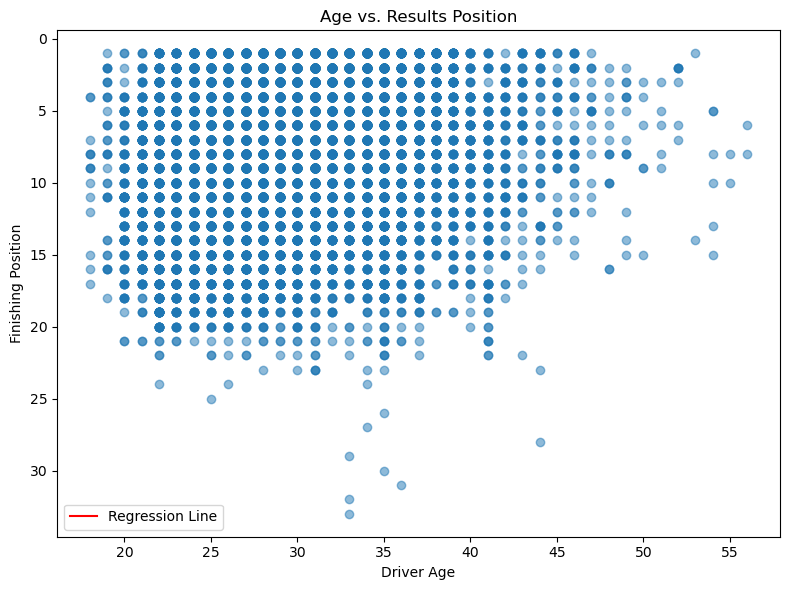

In [91]:
#OLS regression
model_age = smf.ols('results_position ~ age', data=drivers_races_merged_clean).fit()
print(model_age.summary())

# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(drivers_races_merged_clean["age"], drivers_races_merged_clean["results_position"], alpha=0.5)

# Calculate regression line
x = drivers_races_merged_clean["age"]
y = drivers_races_merged_clean["results_position"]
m, b = np.polyfit(x, y, 1)

# Plot regression line
plt.plot(x, m * x + b, color="red", label="Regression Line")

# Final formatting
plt.title("Age vs. Results Position")
plt.xlabel("Driver Age")
plt.ylabel("Finishing Position")
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()


We performed an OLS (Ordinary Least Squares) regression to examine the relationship between a driver’s age and their finishing position in races. In the regression output, the coefficient for age was -0.137 (p < 0.001), indicating that older drivers tend to finish slightly better (i.e., with lower finishing positions) than younger drivers. However, the R-squared value is very low (0.023), meaning that age explains only about 2.3% of the variation in finishing positions.

The scatter plot further supports this conclusion: although a regression line is overlaid, the data points are widely scattered without a clear trend. This suggests that, even though age has a statistically significant association with finishing position, age is not a strong predictor of race outcomes overall.

### 2）Experience (Race Count) vs. Result Position

#### OLS Regression

In [92]:
# OLS for Experience only (race_count)
model_experience = smf.ols('results_position ~ race_counts', data=drivers_races_merged_clean).fit()
print(model_experience.summary())

# OLS for age and race_count 
model_age_experience = smf.ols('results_position ~ age + race_counts', data=drivers_races_merged_clean).fit()
print(model_age_experience.summary())



                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1454.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):          9.79e-304
Time:                        18:37:54   Log-Likelihood:                -43946.
No. Observations:               14934   AIC:                         8.790e+04
Df Residuals:                   14932   BIC:                         8.791e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.0793      0.067    149.765      

We performed an OLS (Ordinary Least Squares) regression to examine the relationship between a driver's total race experience (measured by the number of races participated) and their finishing position. In the regression output, the coefficient for race_count was -0.015 and statistically significant (p < 0.001). This negative coefficient suggests that drivers with more race experience tend to achieve slightly better (lower) finishing positions. However, the R-squared value is still quite low (0.089), indicating that while experience matters more than age, it still explains only a small portion of the variation in race results.

#### Visualization

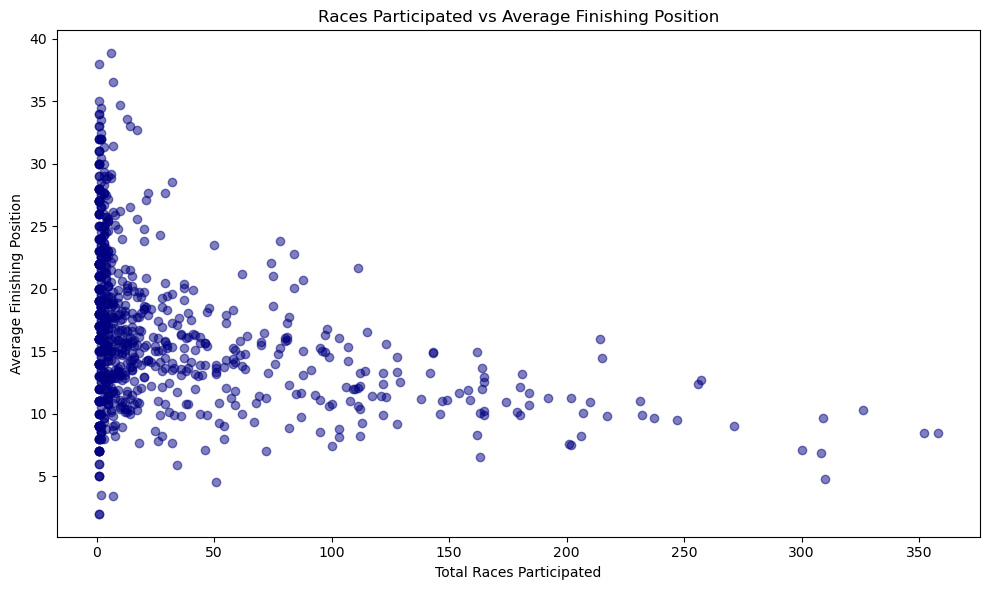

In [93]:
# Step 1: Group by driver and compute race count and average finishing position
driver_stats = drivers_races_merged_clean.groupby('driverId').agg({
    'raceId': 'count',                      # Total races participated
    'positionOrder': 'mean'                # Average race result (finishing position)
}).reset_index()

# Rename columns for clarity
driver_stats = driver_stats.rename(columns={
    'raceId': 'race_count',
    'positionOrder': 'avg_finish_position'
})

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(driver_stats['race_count'], driver_stats['avg_finish_position'], alpha=0.5, color='navy')

plt.xlabel("Total Races Participated")
plt.ylabel("Average Finishing Position")
plt.title("Races Participated vs Average Finishing Position")
plt.tight_layout()
plt.show()

The scatter plot illustrates the relationship between the total number of races participated in and the average finishing position. Overall, drivers who have participated in fewer races show a wide variability in their average finishing positions, ranging from very strong finishes to poor results. In contrast, drivers who have competed in a larger number of races tend to have better and more consistent average finishing positions. Specifically, many drivers with fewer than 50 races have finishing positions scattered between 5 and 35, whereas drivers with over 100 races are generally clustered around better averages between 5 and 20. As the number of races increases, the variability in performance decreases, suggesting that experienced drivers achieve more stable and stronger results. Although a few outliers exist where drivers with high participation still have relatively weaker average positions, the overall trend indicates that greater race participation is associated with better and more consistent finishing performance.

## Factor 2 -- Driver‘s Seasonal Performance 

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2507.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:38:08   Log-Likelihood:                -43481.
No. Observations:               14934   AIC:                         8.697e+04
Df Residuals:                   14932   BIC:                         8.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6075      0.039    222.383      0.0

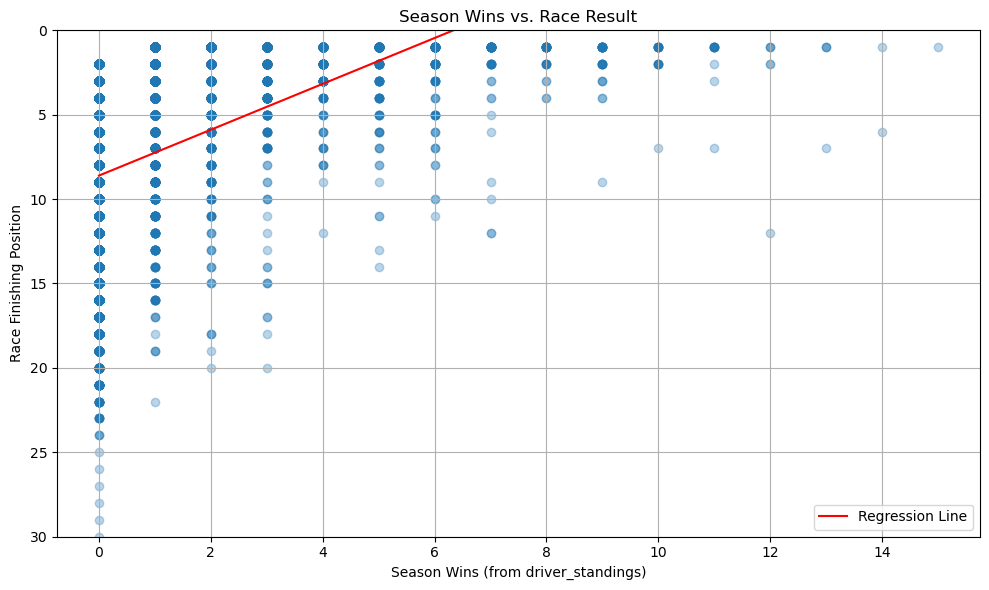

In [95]:
#Run OLS regression
model_wins = smf.ols('results_position ~ wins', data=results_with_wins_cleaned).fit()
print(model_wins.summary())

#Plot
plt.figure(figsize=(10, 6))
plt.scatter(results_with_wins_cleaned['wins'], results_with_wins_cleaned['results_position'], alpha=0.3)

# Regression line
x_vals = np.linspace(results_with_wins_cleaned['wins'].min(), results_with_wins_cleaned['wins'].max(), 100)
y_vals = model_wins.params.Intercept + model_wins.params.wins * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("Season Wins (from driver_standings)")
plt.ylabel("Race Finishing Position")
plt.title("Season Wins vs. Race Result")
plt.ylim(0,30) 
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We performed an OLS (Ordinary Least Squares) regression to investigate the relationship between the number of season wins and race finishing positions. The regression output shows that the coefficient for wins is -1.359, which is highly statistically significant (p < 0.001). This negative coefficient suggests that, on average, drivers who win more races tend to achieve better race results (lower finishing positions). The R-squared value is 0.144, indicating that wins explain about 14.4% of the variance in race results—relatively stronger compared to other factors we examined.

The scatter plot further supports this relationship: despite some dispersion, the overall trend shows that drivers with more season wins tend to finish races in better positions. The downward slope of the regression line visually reinforces that winning drivers are associated with significantly better race performances.



## Factor 3 -- Driver Nationality

In [96]:
# Make sure 'nationality' is categorical
drivers_races_merged_clean['nationality'] = drivers_races_merged_clean['nationality'].astype('category')

# For points: standard descriptive statistics
points_stats = drivers_races_merged_clean['points'].describe().loc[['mean', 'std', 'min', 'max']]
print("Descriptive Statistics for Points:")
print(points_stats)

# For nationality: frequency count
nationality_counts = drivers_races_merged_clean['nationality'].value_counts()
print("\nFrequency Count for Nationality:")
print(nationality_counts)


Descriptive Statistics for Points:
mean     1.881188
std      4.175949
min      0.000000
max     50.000000
Name: points, dtype: float64

Frequency Count for Nationality:
nationality
British              4402
Italian              3401
French               2996
German               2383
Brazilian            1952
American             1246
Finnish              1147
Spanish               821
Australian            820
Austrian              689
Japanese              635
Belgian               591
Swedish               510
Swiss                 496
Dutch                 479
Canadian              452
Mexican               422
New Zealander         396
Argentine             362
Russian               213
South African         210
Danish                177
Monegasque            132
Colombian             125
Venezuelan            120
Polish                 99
Irish                  92
Portuguese             87
Thai                   78
Indian                 59
Chilean                37
Chinese     

In [ ]:

# Run the regression
model_nationality = smf.ols('results_position ~ C(nationality)', data=drivers_races_merged_clean).fit()
print(model_nationality.summary())

# Group by nationality and convert result to list
nationality_groups = drivers_races_merged_clean.groupby("nationality")["results_position"].apply(list)

# Sort nationalities by average performance to make plot easier to read (optional)
nationality_means = nationality_groups.apply(lambda x: sum(x)/len(x))
sorted_nationalities = nationality_means.sort_values().index
sorted_data = [nationality_groups[nat] for nat in sorted_nationalities]

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     33.70
Date:                Sun, 27 Apr 2025   Prob (F-statistic):          5.86e-245
Time:                        18:38:13   Log-Likelihood:                -43993.
No. Observations:               14934   AIC:                         8.807e+04
Df Residuals:                   14893   BIC:                         8.838e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

/var/folders/sl/nfht5cjs09gf74zv7nzby3n80000gn/T/ipykernel_72480/3777951486.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nationality_groups = drivers_races_merged_clean.groupby("nationality")["results_position"].apply(list)


/var/folders/sl/nfht5cjs09gf74zv7nzby3n80000gn/T/ipykernel_72480/1056301344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_positions = drivers_races_merged_clean.groupby('nationality')['results_position'].mean().sort_values().head(10)


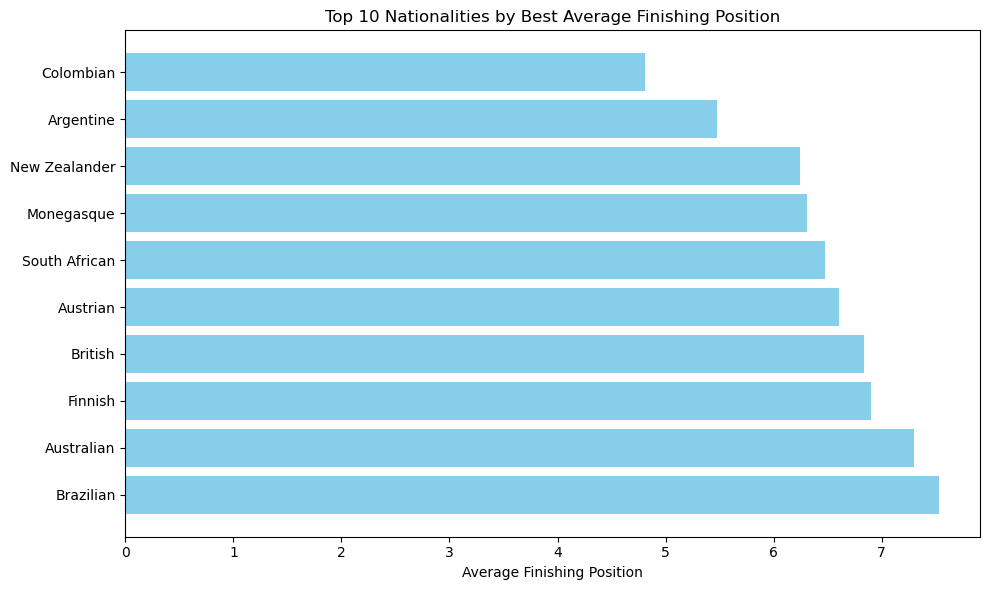

In [104]:
# Compute average finishing position by nationality
# Lower average = better performance
avg_positions = drivers_races_merged_clean.groupby('nationality')['results_position'].mean().sort_values().head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(avg_positions.index, avg_positions.values, color='skyblue')
plt.xlabel("Average Finishing Position")
plt.title("Top 10 Nationalities by Best Average Finishing Position")
plt.gca().invert_yaxis()  # Best (lowest) finishing position at top
plt.tight_layout()
plt.show()



We explored the relationship between driver nationality and average race finishing position. An OLS regression revealed that nationality significantly predicts race outcomes overall (p < 0.001), but the model's explanatory power is modest, with an R-squared of 0.083. This suggests that while nationality is statistically associated with performance, it only explains about 8% of the variation in finishing positions.

The bar chart shows the top 10 nationalities with the best (lowest) average finishing positions. Colombian drivers, on average, had the best race results, followed by Argentine and New Zealander drivers. However, the differences between nationalities, while visually apparent, are relatively small. This indicates that although nationality may be linked to performance to some extent, other factors like individual driver skill and team resources likely play much larger roles in determining race outcomes.

## Factor 4 -- Constructor

In [105]:
# For position: standard descriptive statistics
position_stats = constructors_races_data_cleaned['position'].describe().loc[['mean', 'std', 'min', 'max']]
print("Descriptive Statistics for Position:")
print(position_stats)

# For name: frequency count
constructor_counts = constructors_races_data_cleaned['name'].value_counts()
print("\nFrequency Count for Constructor Name:")
print(constructor_counts)

# For nationality: frequency count
nationality_counts = constructors_races_data_cleaned['nationality'].value_counts()
print("\nFrequency Count for Constructor Nationality:")
print(nationality_counts)


Descriptive Statistics for Position:
mean     7.942491
std      4.806021
min      1.000000
max     33.000000
Name: position, dtype: float64

Frequency Count for Constructor Name:
name
Ferrari      1679
McLaren      1300
Williams     1144
Red Bull      576
Sauber        532
             ... 
Nichels         1
Wetteroth       1
Olson           1
Rae             1
ENB             1
Name: count, Length: 161, dtype: int64

Frequency Count for Constructor Nationality:
nationality
British          6469
Italian          3210
French           1281
Swiss             777
German            718
Austrian          576
American          496
Japanese          354
Indian            349
Irish             275
Malaysian         141
Russian           110
Spanish            79
Brazilian          69
Canadian           34
Dutch              27
Hong Kong          21
South African       2
Belgian             1
Name: count, dtype: int64


### 1）Constructor vs. Result

In [ ]:


# Convert constructor name to categorical if it's not already
constructors_races_data_cleaned["name"] = constructors_races_data_cleaned["name"].astype("category")

# Run regression: constructor name as categorical predictor
model_constructor_name = smf.ols(
    "position ~ C(name)", data=constructors_races_data_cleaned
).fit()

# Display results
print(model_constructor_name.summary())


/var/folders/sl/nfht5cjs09gf74zv7nzby3n80000gn/T/ipykernel_72480/1611896211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constructors_races_data_cleaned["position"] = pd.to_numeric(
/var/folders/sl/nfht5cjs09gf74zv7nzby3n80000gn/T/ipykernel_72480/1611896211.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constructors_races_data_cleaned["name"] = constructors_races_data_cleaned["name"].astype("category")


                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     47.98
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:12:59   Log-Likelihood:                -41672.
No. Observations:               14989   AIC:                         8.367e+04
Df Residuals:                   14828   BIC:                         8.489e+04
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/var/folders/sl/nfht5cjs09gf74zv7nzby3n80000gn/T/ipykernel_72480/976999396.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_constructors = constructors_races_data_filtered.groupby('name')['position'] \
/var/folders/sl/nfht5cjs09gf74zv7nzby3n80000gn/T/ipykernel_72480/976999396.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered.groupby(['year', 'name'])['position'].mean().reset_index()


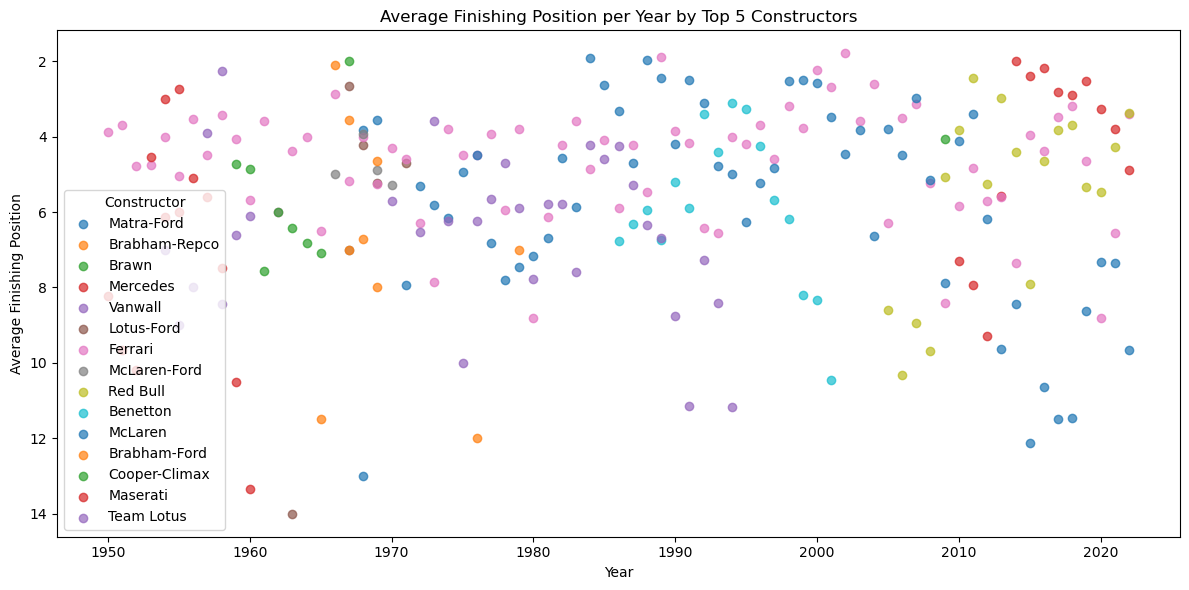

In [146]:
# Step 0: Filter out constructors with <10 races
constructor_counts = constructors_races_data_cleaned['name'].value_counts()
active_constructors = constructor_counts[constructor_counts >= 20].index.tolist()
constructors_races_data_filtered = constructors_races_data_cleaned[
    constructors_races_data_cleaned['name'].isin(active_constructors)
]

# Step 1: Top 5 by best average position
top_constructors = constructors_races_data_filtered.groupby('name')['position'] \
    .mean().sort_values(ascending=True).head(15).index.tolist()

# Step 2: Filter only those top 5
filtered = constructors_races_data_filtered[
    constructors_races_data_filtered['name'].isin(top_constructors)
]

# Step 3: Group by year and name, average
grouped = filtered.groupby(['year', 'name'])['position'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(12,6))
for constructor in top_constructors:
    constructor_data = grouped[grouped['name'] == constructor]
    plt.scatter(constructor_data['year'], constructor_data['position'], label=constructor, alpha=0.7)

plt.gca().invert_yaxis()
plt.title("Average Finishing Position per Year by Top 5 Constructors")
plt.xlabel("Year")
plt.ylabel("Average Finishing Position")
plt.legend(title="Constructor")
plt.tight_layout()
plt.show()



We performed an OLS (Ordinary Least Squares) regression to examine the relationship between constructor identity and race finishing position. The regression output shows that constructor name was a statistically significant predictor of finishing position (p < 0.001 overall). The R-squared value is 0.341, indicating that about 34.1% of the variance in race results can be explained by differences between constructors. This suggests that constructor choice plays a substantial role in determining race outcomes, though other factors like driver skill, weather, and strategy likely contribute to the remaining variance. It is important to note that because there are many constructors included, and some multicollinearity was detected, interpretation should focus on general patterns rather than individual coefficients.

The scatter plot further supports this relationship: teams with consistently strong constructors tend to cluster around better (lower) average finishing positions over time. After filtering for constructors with more than 20 races and selecting those with the best average positions, the visualization shows that dominant teams like Mercedes, Red Bull, and Ferrari repeatedly achieve top placements across multiple seasons. Meanwhile, earlier-era constructors such as Lotus-Ford and Matra-Ford demonstrate peak performance in the mid-20th century. Overall, the graphical trend confirms that constructor strength is strongly associated with better race performances over a wide historical span.

### 2）Constructor Nationality vs. Result position

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     160.9
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:24:48   Log-Likelihood:                -43315.
No. Observations:               14934   AIC:                         8.667e+04
Df Residuals:                   14915   BIC:                         8.681e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

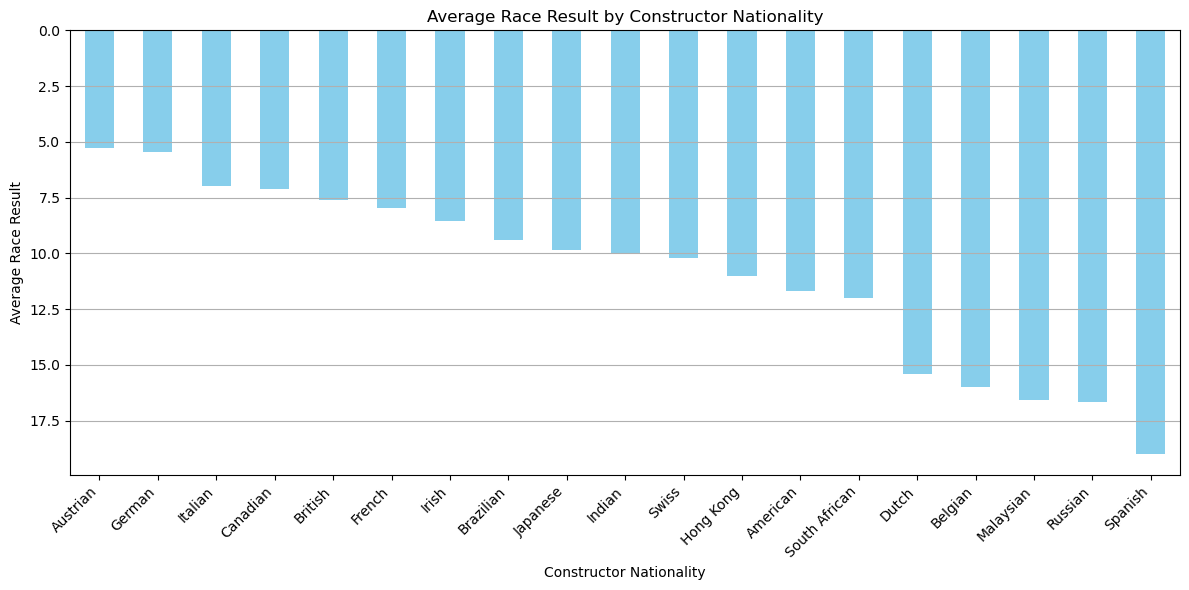

In [117]:
# Step 1: Merge in constructor nationality
constructors_nationality = constructors[['constructorId', 'nationality']].rename(columns={'nationality': 'constructor_nationality'})
results_with_nationality = pd.merge(drivers_races_merged_clean, constructors_nationality, on='constructorId', how='left')

# Step 2: Drop missing results
results_with_nationality = results_with_nationality.dropna(subset=['results_position'])

# Step 3: Run OLS regression
model_nat = smf.ols('results_position ~ C(constructor_nationality)', data=results_with_nationality).fit()

# Step 4: Print model summary
print(model_nat.summary())

# Step 5: Group and calculate mean result per nationality
avg_results_by_nat = results_with_nationality.groupby('constructor_nationality')['results_position'].mean().sort_values()

# Step 6: Plot
plt.figure(figsize=(12, 6))
avg_results_by_nat.plot(kind='bar', color='skyblue')
plt.ylabel("Average Race Result")
plt.xlabel("Constructor Nationality")
plt.title("Average Race Result by Constructor Nationality")
plt.gca().invert_yaxis()  # Lower is better in F1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


We performed an OLS (Ordinary Least Squares) regression to investigate the relationship between constructor nationality and race finishing position. The regression output shows that nationality does have a statistically significant relationship with finishing positions, although the magnitude varies by country. For example, constructors from Austria (coefficient = -6.399, p < 0.001) and Germany (coefficient = -6.217, p < 0.001) are associated with significantly better race results (lower finishing positions) compared to the baseline. In contrast, some nationalities like Belgium (coefficient = 4.305, p = 0.329) did not show a significant difference. The R-squared value is 0.163, indicating that constructor nationality explains about 16.3% of the variance in race results—moderate compared to other predictors examined

The bar plot further supports this relationship: the average race finishing positions vary across constructor nationalities. Nationalities associated with historically dominant constructors (e.g., Austria and Germany) tend to have lower (better) average race results, whereas constructors from other countries tend to have higher (worse) average finishing positions. This visual pattern reinforces the statistical results from the regression.

## Factor 5 -- Qualifying Position & Results

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     1367.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):          3.54e-243
Time:                        20:49:18   Log-Likelihood:                -7126.0
No. Observations:                2747   AIC:                         1.426e+04
Df Residuals:                    2745   BIC:                         1.427e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5351    

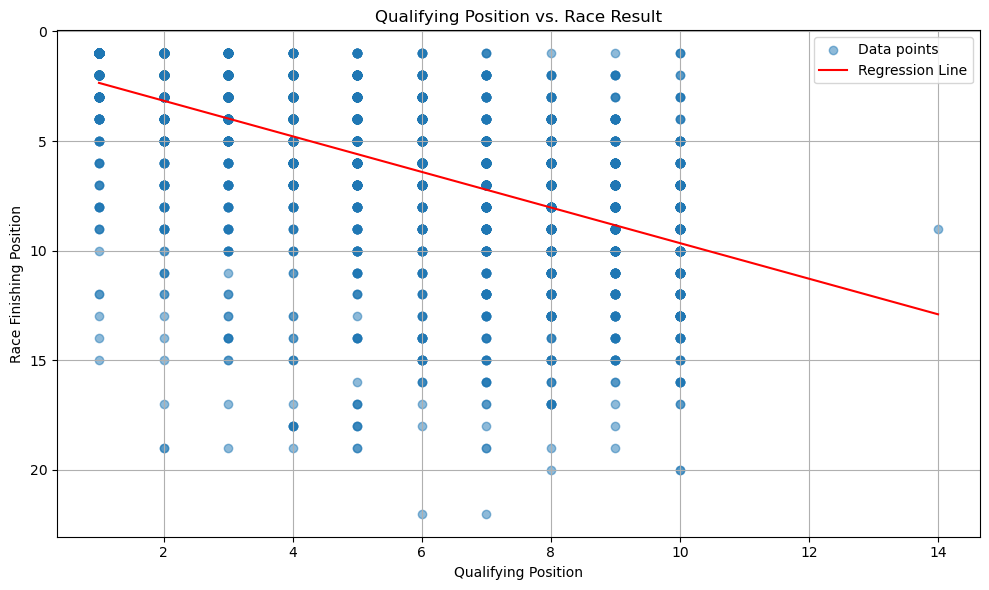

In [147]:
# Run OLS regression
model_qualifying = smf.ols('results_position ~ qualifying_position', data=qualifying_results_races_merged_clean).fit()

# Show regression summary
print(model_qualifying.summary())

# Scatterplot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(
    qualifying_results_races_merged_clean['qualifying_position'],
    qualifying_results_races_merged_clean['results_position'],
    alpha=0.5, label='Data points'
)

# Regression line
x_vals = np.linspace(
    qualifying_results_races_merged_clean['qualifying_position'].min(),
    qualifying_results_races_merged_clean['qualifying_position'].max(), 100
)
y_vals = model_qualifying.params.Intercept + model_qualifying.params.qualifying_position * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')


# Labels and formatting
plt.xlabel("Qualifying Position")
plt.ylabel("Race Finishing Position")
plt.title("Qualifying Position vs. Race Result")
plt.gca().invert_yaxis()  # Lower position = better
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We performed an OLS (Ordinary Least Squares) regression to investigate the relationship between qualifying position and race finishing position. The regression output shows that the coefficient for qualifying position is 0.812, which is highly statistically significant (p < 0.001). This positive coefficient indicates that drivers who start with a higher qualifying position number (i.e., further back) tend to finish in worse positions on average. Conversely, drivers qualifying closer to the front rows are more likely to achieve better race results (lower finishing positions). The R-squared value is 0.332, meaning that about 33.2% of the variance in race finishing positions is explained by qualifying performance—a fairly strong relationship for racing data.

The scatterplot with the regression line visually supports this finding: we observe a clear upward trend, where poorer qualifying spots are associated with poorer race outcomes. The upward-sloping regression line reinforces that starting closer to the front gives a competitive advantage in achieving better race results.



## V. Conclusion / Discussion

In this project, we sought to explore the key factors that influence race outcomes in Formula 1 by analyzing a comprehensive dataset that includes driver information, constructor standings, race results, and circuit characteristics.

Initially, we examined whether basic driver characteristics, such as age and race experience, could predict race performance. Although regressions showed statistical significance, the practical predictive power was very weak. Specifically, the regression of driver age on race finishing position yielded an R-squared value of only 0.023​
, and the regression of number of races (experience) on race outcome produced an R-squared of just 0.089​
. This suggests that while these variables may show minor statistical relationships, they explain very little real variation in actual race results.

Recognizing this, we shifted our focus toward more performance-oriented predictors. Incorporating qualifying position dramatically improved model performance: the regression of qualifying position on race result achieved an R-squared of 0.332​
, substantially higher than the experience-based models. This finding highlights that qualifying position is a much stronger determinant of final race placement.

We also analyzed constructor performance, using constructor nationality and points data. While some constructor effects were significant, the overall model including constructor nationality achieved an R-squared of 0.163​
, indicating a moderate impact but suggesting that constructor strength alone does not fully determine race success — emphasizing the interplay between driver skill, team performance, and race-day factors.

Given that, qualifying position explained 33.2% of the variation in race outcomes (R² = 0.332), showing that starting grid position is a major determinant of where a driver finishes. Alternatively, constructor team strength (through constructor nationality and points) also mattered, but to a lesser extent, explaining around 16.3% of the variation (R² = 0.163). Overall, success in Formula 1 is more about immediate race-day performance and team quality than about how old or how experienced a driver is. Teams and drivers aiming for better results should prioritize qualifying performance and car development, not just driver career length or age. 
